In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,f1_score,precision_score,recall_score,precision_recall_curve,accuracy_score,classification_report,plot_precision_recall_curve
from sklearn.metrics import confusion_matrix, plot_roc_curve,log_loss
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, uniform
from warnings import filterwarnings
filterwarnings("ignore")

In [24]:
# import tensorflow
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Input

In [4]:
import pickle
with open(r"Train_test_samples/train_test_split1.pkl","rb") as a:
    train_test_split = pickle.load(a)
with open(r"saved_pickle/encoders.pkl","rb") as a:
    encoders = pickle.load(a)
X_train = train_test_split['X_train']
X_test = train_test_split['X_test']
y_train = train_test_split['y_train']
y_test = train_test_split['y_test']


min_scaler = encoders['min_scaler']
std_scaler = encoders['std_scaler']
encoder = encoders['encoder']

In [6]:
numerical_cols = std_scaler.transform(X_train.select_dtypes(exclude='object'))
categorical_cols = encoder.transform(X_train.select_dtypes(include='object'))

X_train_scaled = np.hstack((numerical_cols,categorical_cols))

In [7]:
numerical_cols_ = std_scaler.transform(X_test.select_dtypes(exclude='object'))
categorical_cols_ = encoder.transform(X_test.select_dtypes(include='object'))

X_test_scaled = np.hstack((numerical_cols_,categorical_cols_))

In [10]:
pd.DataFrame(y_train).value_counts()

1    40917
0    33970
dtype: int64

In [8]:
def accuracy_func(x,y,over,model):
        x_ = x[x["current_over"]>=over]
        y_ = y[x["current_over"]>=over]
        
        numerical_cols = std_scaler.transform(x_.select_dtypes(exclude='object'))
        categorical_cols = encoder.transform(x_.select_dtypes(include='object'))

        x_ = np.hstack((numerical_cols,categorical_cols))
        return model.score(x_,y_)
        

In [9]:
def plot_scores(model,name):
    accuracy_list_train = []
    accuracy_list_test = []
    for i in range(20):

        accuracy_list_train.append(accuracy_func(X_train,y_train,i,model))
        accuracy_list_test.append(accuracy_func(X_test,y_test,i,model))

    import matplotlib.pyplot as plt
    plt.plot(range(1,21),accuracy_list_train)
    plt.plot(range(1,21),accuracy_list_test)
    plt.title(name)
    plt.xlabel('Over')
    plt.ylabel('Accuracy_score')
    plt.xticks(range(1,21))
    plt.grid()
    return plt.show()    

## Logistic Regression

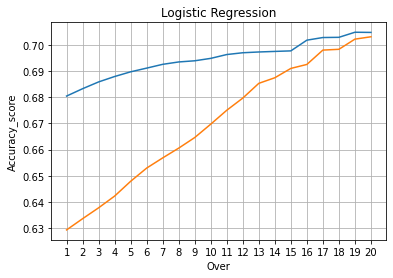

Training Accuracy: 0.680436726685442
Test Accuracy: 0.6293279839518555
F1Score: 0.6741208422983317


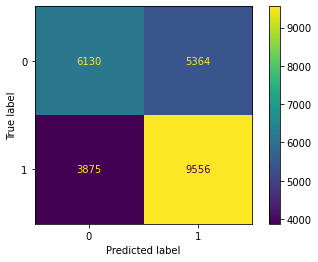

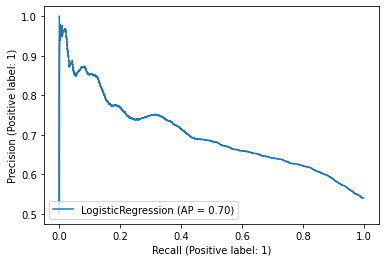

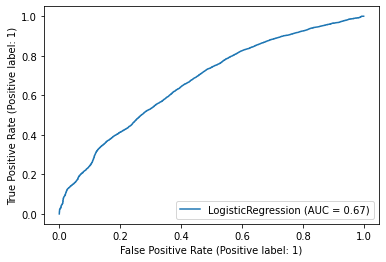

In [10]:
lr = LogisticRegression(penalty='l2',C = 0.04, solver='liblinear', class_weight={0:0.6,1:0.5})
lr.fit(X_train_scaled,y_train)
plot_scores(lr,'Logistic Regression')
print('Training Accuracy:',accuracy_score(y_train,lr.predict(X_train_scaled)))
print('Test Accuracy:', accuracy_score(y_test,lr.predict(X_test_scaled)))
plot_confusion_matrix(lr,X_test_scaled,y_test)
plot_precision_recall_curve(lr,X_test_scaled,y_test)
plot_roc_curve(lr, X_test_scaled,y_test)
print('F1Score:', f1_score(y_test,lr.predict(X_test_scaled)))

In [128]:
lr

LogisticRegression(C=0.01, class_weight={0: 0.6, 1: 0.5}, penalty='l1',
                   solver='saga')

## Gradient Boosting Classifier

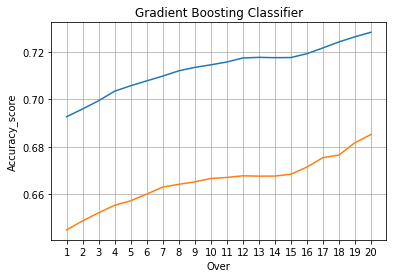

Training Accuracy: 0.6926495909024172
Test Accuracy: 0.6449348044132397
F1Score: 0.7153608645310691


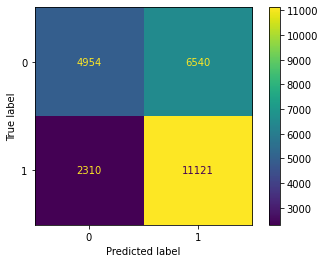

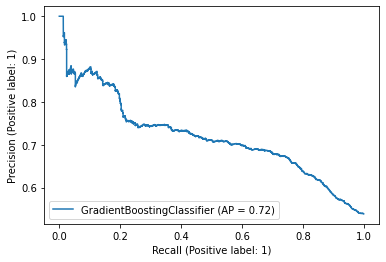

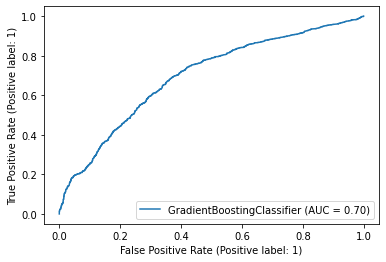

In [38]:
gbdt = GradientBoostingClassifier(
                            max_depth=2,
                            subsample=0.3,
                            max_features=0.2,
                            min_samples_leaf=5,
                            n_estimators = 100
                            )


gbdt.fit(X_train_scaled,y_train)

plot_scores(gbdt,'Gradient Boosting Classifier')
print('Training Accuracy:',accuracy_score(y_train,gbdt.predict(X_train_scaled)))
print('Test Accuracy:', accuracy_score(y_test,gbdt.predict(X_test_scaled)))
plot_confusion_matrix(gbdt,X_test_scaled,y_test)
plot_precision_recall_curve(gbdt,X_test_scaled,y_test)
plot_roc_curve(gbdt, X_test_scaled,y_test)
print('F1Score:', f1_score(y_test,gbdt.predict(X_test_scaled)))

In [17]:
gbdt

GradientBoostingClassifier(max_depth=2, max_features=0.3, min_samples_leaf=3,
                           subsample=0.4)

## Decision Tree Classifier

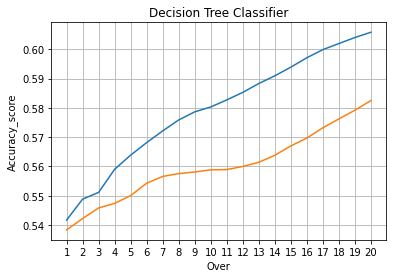

Training Accuracy: 0.6058248021249049
Test Accuracy: 0.5825075225677031
F1Score: 0.7045596502186133


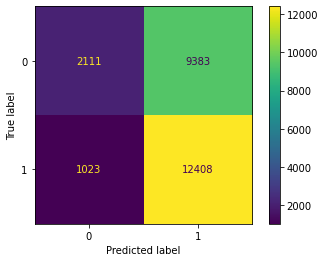

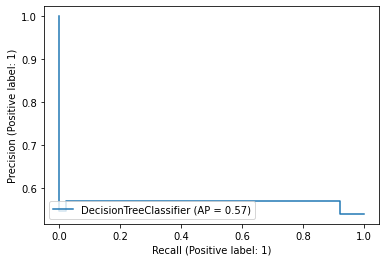

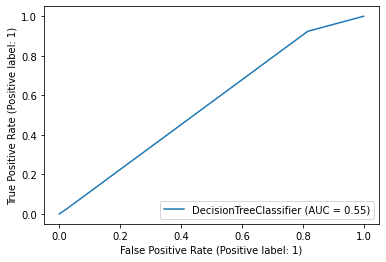

In [30]:
# from sklearn.tree import DecisionTreeClassifier

# #Hyper Parameter Tuning
# param_dist = {  "splitter":['best','random'],
#                 "criterion":['gini','entropy'],
#                 "max_features":uniform(0.1,1.0),
#                 "max_depth":range(1,7),
#                 "max_leaf_nodes":range(1,7)
#             }
# clf = RandomizedSearchCV(DecisionTreeClassifier(class_weight={0:0.7,1:0.5}),
#                         param_distributions= param_dist,n_iter=50, cv=5)
# clf.fit(X_train_scaled,y_train)
# dtc = clf.best_estimator_

# dtc.fit(X_train_scaled,y_train)
dtc = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, max_features=0.3,class_weight={0:0.6,1:0.5}).fit(X_train_scaled,y_train)
plot_scores(dtc,'Decision Tree Classifier')
print('Training Accuracy:',accuracy_score(y_train,dtc.predict(X_train_scaled)))
print('Test Accuracy:', accuracy_score(y_test,dtc.predict(X_test_scaled)))
plot_confusion_matrix(dtc,X_test_scaled,y_test)
plot_precision_recall_curve(dtc,X_test_scaled,y_test)
plot_roc_curve(dtc, X_test_scaled,y_test)
print('F1Score:', f1_score(y_test,dtc.predict(X_test_scaled)))

## Random Forest Classifier

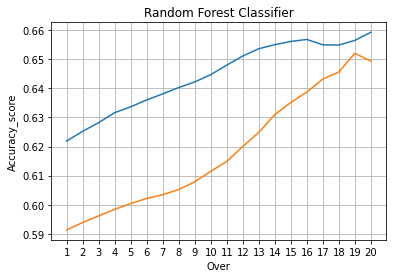

Training Accuracy: 0.6218683680143084
Test Accuracy: 0.591334002006018
F1Score: 0.7056409663622702


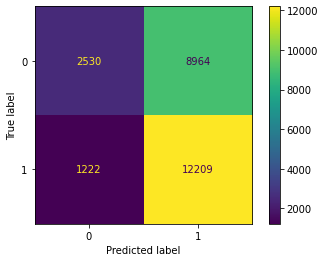

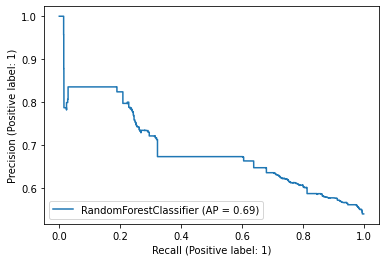

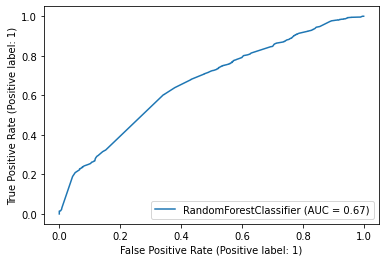

In [31]:
rfc = RandomForestClassifier(n_estimators= 100,
                             max_depth=2, 
                             max_leaf_nodes=3, 
                             max_features=0.3).fit(X_train_scaled,y_train)
plot_scores(rfc,'Random Forest Classifier')
print('Training Accuracy:',accuracy_score(y_train,rfc.predict(X_train_scaled)))
print('Test Accuracy:', accuracy_score(y_test,rfc.predict(X_test_scaled)))
plot_confusion_matrix(rfc,X_test_scaled,y_test)
plot_precision_recall_curve(rfc,X_test_scaled,y_test)
plot_roc_curve(rfc, X_test_scaled,y_test)
print('F1Score:', f1_score(y_test,rfc.predict(X_test_scaled)))

In [48]:
models_data = pd.DataFrame(columns=["Model Name","Train Accuracy","Test Accuracy","Log Loss","Precision","Recall","F1 Score"])
models_data

,Model Name,Train Accuracy,Test Accuracy,Log Loss,Precision,Recall,F1 Score


In [49]:
def update_models_data(model,model_name):
    global models_data
   
    model.fit(X_train_scaled,y_train)
    out = model.predict(X_test_scaled)
    out_proba = model.predict_proba(X_test_scaled)
    trn_acc = accuracy_score(y_train,model.predict(X_train_scaled))
    tst_acc = accuracy_score(y_test,out)
    l_loss = log_loss(y_test,out_proba)
    prec = precision_score(y_test,out)
    rec = recall_score(y_test,out)
    f1 = f1_score(y_test,out)
    
    models_data = models_data.append({"Model Name": model_name,
                        "Train Accuracy":trn_acc,
                        "Test Accuracy":tst_acc,
                        "Log Loss":l_loss,
                        "Precision":prec,
                        "Recall":rec,
                        "F1 Score":f1,
                        },
                       ignore_index = True)

In [50]:
update_models_data(lr,'Logistic Regression')
update_models_data(dtc,'Decision Tree')
update_models_data(rfc,'Random Forest')
update_models_data(gbdt,'Gradient Boosting')

In [51]:
models_data

,Model Name,Train Accuracy,Test Accuracy,Log Loss,Precision,Recall,F1 Score
0,Logistic Regression,0.680437,0.629328,0.656756,0.640483,0.711488,0.674121
1,Decision Tree,0.605825,0.582508,0.651102,0.569409,0.923833,0.70456
2,Random Forest,0.612458,0.580181,0.664394,0.570099,0.898295,0.69752
3,Gradient Boosting,0.694532,0.652317,0.633628,0.634052,0.839029,0.722279


In [28]:
X_train.shape

(74921, 15)

## Training a Neural Network model

In [37]:
# model = Sequential()

# model.add(Input(shape=(72,)))
# model.add(Dense(units = 64, activation='relu'))
# model.add(Dense(units = 32, activation='relu'))
# model.add(Dense(units = 8, activation='relu'))
# model.add(Dense(units = 1, activation='sigmoid'))
# model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                4672      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 8)                 264       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 7,025
Trainable params: 7,025
Non-trainable params: 0
_________________________________________________________________


In [38]:
from tensorflow.keras.losses import BinaryCrossentropy

In [39]:
model.compile(optimizer='adam', loss= BinaryCrossentropy(),metrics=['accuracy'])

In [11]:
# history = model.fit(x=X_train_scaled,y=y_train, batch_size=256, epochs=50, verbose=1,validation_data=(X_test_scaled,y_test))

## Hyper parameter tuning

In [ ]:
# param_dist = {"penalty":['l1','l2','elasticnet'],
#              "C":[0.01,0.1,1.0],
#              "solver":['liblinear','sag','saga','lbfgs']
#              }
# clf = RandomizedSearchCV(LogisticRegression(class_weight = {0:0.6, 1:0.5}),
#                         param_distributions= param_dist, n_iter=30, cv=3)
# clf.fit(X_train_scaled,y_train)
# lr = clf.best_estimator_
# lr


In [ ]:
#Hyper Parameter Tuning
# param_dist = {"n_estimators": range(10,100,10),
#                "max_features":range(5,20,2),
#                "max_samples":uniform(0.1,0.8),
#               "max_depth":range(3,15),
              
#              }
# clf = RandomizedSearchCV(RandomForestClassifier(class_weight={0:0.6,1:0.5}),
#                         param_distributions= param_dist,n_iter=30, cv=3)
# clf.fit(X_train_scaled,y_train)
# rfc = clf.best_estimator_

# rfc.fit(X_train_scaled,y_train)

In [ ]:
# param_dist = {
#                 "subsample":uniform(0.2,1.0),
#                 "max_features":uniform(0.2,1.0),
#                 "max_depth":range(1,4),
#                 "min_samples_leaf":range(1,4)
#              }
# clf = RandomizedSearchCV(GradientBoostingClassifier(n_estimators=100),
#                         param_distributions= param_dist,n_iter=30, cv=3)
# clf.fit(X_train_scaled,y_train)
# gbdt = clf.best_estimator_

In [71]:
import pickle
with open("saved_pickle/model_lr_inn1.pkl", 'wb') as f:
    pickle.dump(lr,f)

In [76]:
import pickle
with open("saved_pickle/model_gbdt4_inn1.pkl", 'wb') as f:
    pickle.dump(gbdt,f)

In [42]:
with open("saved_pickle/model_gbdt4_inn1.pkl", 'rb') as f:
    gbdt= pickle.load(f)

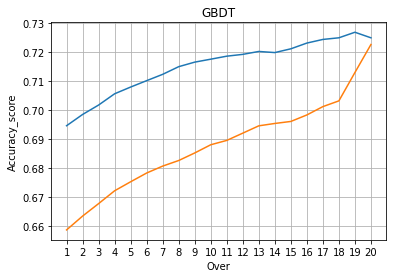

In [43]:
plot_scores(gbdt,'GBDT')

In [36]:
with open("saved_pickle/column_sequence1.pkl", "rb") as a:
    col_seq = pickle.load(a)

In [37]:
col_seq

Index(['score', 'team1_ban', 'team1_csk', 'team2_dd', 'team2_rr'], dtype='object')

# *Hyperparameter Tuning for LogisticRegression*

In [65]:
param_dist = {
             "C":[0.1,1,10,100],
             "class_weight":{0:uniform(0,1), 1:uniform(0,1)}
             }
clf = RandomizedSearchCV(LogisticRegression(),
                        param_distributions= param_dist, n_iter=10, cv=5)
clf.fit(X_train_scaled,y_train)
lr = clf.best_estimator_
lr

LogisticRegression(C=0.1,
                   class_weight=<scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CAEA0A9CA0>)

# *Hyperparameter Tuning for RandomForest*

In [13]:
param_dist = {"n_estimators": list(range(10,100,10)),
               "max_features":range(5,20,2),
               "max_samples":uniform(0.1,0.8),
              "max_depth":range(3,15),
              
             }
clf = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions= param_dist, n_iter=20, cv=5)
clf.fit(X_train_scaled,y_train)
lr = clf.best_estimator_
lr

RandomForestClassifier(max_depth=14, max_features=9,
                       max_samples=0.7781461979598258, n_estimators=70)

In [255]:
param_dist = {
                "n_estimators": range(10,40,10),
                "max_features":uniform(0.2,0.5),
                "max_depth":range(1,5),
                "min_samples_leaf":range(1,5)
             }
clf = RandomizedSearchCV(GradientBoostingClassifier(),
                        param_distributions= param_dist,n_iter=30, cv=3)
clf.fit(X_train_scaled,y_train)
lr = clf.best_estimator_
lr

GradientBoostingClassifier(max_features=0.4046128221252464, min_samples_leaf=3,
                           n_estimators=20)

## Checking what is causing underfitting

In [10]:
import os
os.chdir('../')
# cwd = os.getcwd()  # Get the current working directory (cwd)
# files = os.listdir(cwd)  # Get all the files in that directory
# print("Files in %r: %s" % (cwd, files))

In [11]:
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\Deepesh\\Practice\\archive (1)': ['.ipynb_checkpoints', '1648479876203.jpg', 'beautifulSoup.ipynb', 'best_model_yet.sav', 'best_rf_model.sav', 'bootstraping.ipynb', 'Data Preparation.ipynb', 'dataset_v1.csv', 'dataset_v2.csv', 'data_preparation.ipynb', 'data_preparationv2.ipynb', 'data_prep_v3.ipynb', 'data_v2.csv', 'data_v2.ipynb', 'data_v3.csv', 'functional.py', 'hyper_param_tuning.ipynb', 'idea.ipynb', 'IPL Ball-by-Ball 2008-2020.csv', 'IPL Matches 2008-2020.csv', 'Model Building', 'modelling.ipynb', 'Modelling1.ipynb', 'Modelling2-2.ipynb', 'Modelling2.ipynb', 'Modelling3.ipynb', 'Modelling4.ipynb', 'saved_pickle', 'special_split.ipynb', 'Test_x.pkl', 'titanic', 'titanic.ipynb', 'titanic.zip', 'Train_test_samples', 'Untitled Folder', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb']


In [15]:
view = pd.read_csv('abc.csv')

In [16]:
view

,Unnamed: 0,0,1
0,team1=>Gujarat Titans,121.0,1233.0
1,team1=>Kochi Tuskers Kerala,123.0,382.0
2,venue=>OUTsurance Oval,124.0,NaN
3,venue=>Vidarbha Cricket Association Stadium,124.0,NaN
4,venue=>Holkar Cricket Stadium,125.0,834.0
5,venue=>Himachal Pradesh Cricket Association St...,127.0,492.0
6,venue=>JSCA International Stadium Complex,224.0,365.0
7,team1=>Rising Pune Supergiant,246.0,374.0
8,venue=>St George's Park,248.0,247.0
9,venue=>Buffalo Park,250.0,130.0


In [173]:
y_train[X_train[X_train["venue"]=='OUTsurance Oval'].index]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
data = pd.read_csv('data_v3.csv')

In [169]:
X_train = X_train.reset_index()

In [164]:
X_train.shape

(74959, 15)

In [170]:
view = pd.DataFrame({'venue':X_train.venue.unique()})

In [171]:
view['lose'] = view['venue'].map(lambda x:(y_train[X_train[X_train['venue']==x].index]==0).astype(int).sum())
view['win'] = view['venue'].map(lambda x:(y_train[X_train[X_train['venue']==x].index]==1).astype(int).sum())

In [172]:
view

,venue,lose,win
0,M Chinnaswamy Stadium,3004,4161
1,Punjab Cricket Association IS Bindra Stadium,2296,2810
2,Feroz Shah Kotla,3346,3768
3,Eden Gardens,2737,4236
4,Sawai Mansingh Stadium,1245,2607
5,Rajiv Gandhi International Stadium,2742,2972
6,"MA Chidambaram Stadium, Chepauk",2978,1754
7,Dr DY Patil Sports Academy,627,1085
8,Wankhede Stadium,3234,3566
9,Newlands,243,119


In [134]:
data[data['venue']=='Green Park'].id.unique()

array([ 981001,  981007, 1082640, 1082643], dtype=int64)